In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Link for dataset and background info
https://crime-data-explorer.fr.cloud.gov/pages/downloads#datasets

Years: 1991-2020
Last modified: October 25, 2021

There are 219577 rows and 28 columns

In [2]:
hate_crime = pd.read_csv('hate_crime.csv')
hate_crime

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219572,1318026,2020,WY0170100,Sheridan,NaN,City,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,2,Intimidation,2.0,Park/Playground,"Anti-Lesbian, Gay, Bisexual, or Transgender (M...",Individual,S,S
219573,1142103,2020,WY0210100,Evanston,NaN,City,WY,Wyoming,Mountain,West,...,Unknown,Unknown,1,Destruction/Damage/Vandalism of Property,0.0,Park/Playground,Anti-White,Government,S,S
219574,1318018,2020,WY0210100,Evanston,NaN,City,WY,Wyoming,Mountain,West,...,Black or African American,Not Hispanic or Latino,1,Aggravated Assault,1.0,Residence/Home,Anti-White,Individual,S,S
219575,1318022,2020,WY0210100,Evanston,NaN,City,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,1,Simple Assault,1.0,Residence/Home,Anti-Female,Individual,S,S


# EDA

In [3]:
#checking dtypes and missing values in the data

hate_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219577 entries, 0 to 219576
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   INCIDENT_ID               219577 non-null  int64  
 1   DATA_YEAR                 219577 non-null  int64  
 2   ORI                       219577 non-null  object 
 3   PUB_AGENCY_NAME           219577 non-null  object 
 4   PUB_AGENCY_UNIT           6431 non-null    object 
 5   AGENCY_TYPE_NAME          219577 non-null  object 
 6   STATE_ABBR                219577 non-null  object 
 7   STATE_NAME                219577 non-null  object 
 8   DIVISION_NAME             219577 non-null  object 
 9   REGION_NAME               219577 non-null  object 
 10  POPULATION_GROUP_CODE     219577 non-null  object 
 11  POPULATION_GROUP_DESC     219577 non-null  object 
 12  INCIDENT_DATE             219577 non-null  object 
 13  ADULT_VICTIM_COUNT        51411 non-null   f

In [4]:
#dropping duplicate columns like state name
hate_crime = hate_crime.drop(['STATE_NAME', 'POPULATION_GROUP_DESC', 'PUB_AGENCY_UNIT'], axis=1)
hate_crime.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,AGENCY_TYPE_NAME,STATE_ABBR,DIVISION_NAME,REGION_NAME,POPULATION_GROUP_CODE,INCIDENT_DATE,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,City,AR,West South Central,South,5,31-AUG-91,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,City,AR,West South Central,South,6,19-SEP-91,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,City,AR,West South Central,South,3,04-JUL-91,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,City,AR,West South Central,South,3,24-DEC-91,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,City,AR,West South Central,South,3,23-DEC-91,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


In [5]:
#removing addtional columns not needed for analysis. Can change later 

hate_crime = hate_crime.drop(['ORI', 'PUB_AGENCY_NAME', 'AGENCY_TYPE_NAME', ], axis=1)

In [6]:
#checking null values

percent_missing = hate_crime.isnull().sum() *100/len(hate_crime)
missing_values_df = pd.DataFrame({'column_name': hate_crime.columns, 'percent_missing': percent_missing})
missing_values_df.sort_values('percent_missing', inplace = True)
missing_values_df

,column_name,percent_missing
INCIDENT_ID,INCIDENT_ID,0.000000
VICTIM_TYPES,VICTIM_TYPES,0.000000
BIAS_DESC,BIAS_DESC,0.000000
LOCATION_NAME,LOCATION_NAME,0.000000
OFFENSE_NAME,OFFENSE_NAME,0.000000
VICTIM_COUNT,VICTIM_COUNT,0.000000
MULTIPLE_OFFENSE,MULTIPLE_OFFENSE,0.000000
TOTAL_OFFENDER_COUNT,TOTAL_OFFENDER_COUNT,0.000000
MULTIPLE_BIAS,MULTIPLE_BIAS,0.000000
INCIDENT_DATE,INCIDENT_DATE,0.000000


In [7]:
#drop columns with more than 70% missing values
perc = 70.0
min_count = int(((100-perc)/100)*hate_crime.shape[0]+1)
hate_crime = hate_crime.dropna(axis=1, thresh=min_count)

#checking remaining missing values
hate_crime.isnull().sum()

INCIDENT_ID                    0
DATA_YEAR                      0
STATE_ABBR                     0
DIVISION_NAME                  0
REGION_NAME                    0
POPULATION_GROUP_CODE          0
INCIDENT_DATE                  0
TOTAL_OFFENDER_COUNT           0
OFFENDER_RACE                 20
VICTIM_COUNT                   0
OFFENSE_NAME                   0
TOTAL_INDIVIDUAL_VICTIMS    3479
LOCATION_NAME                  0
BIAS_DESC                      0
VICTIM_TYPES                   0
MULTIPLE_OFFENSE               0
MULTIPLE_BIAS                  0
dtype: int64

In [8]:
hate_crime.isnull().sum()

INCIDENT_ID                    0
DATA_YEAR                      0
STATE_ABBR                     0
DIVISION_NAME                  0
REGION_NAME                    0
POPULATION_GROUP_CODE          0
INCIDENT_DATE                  0
TOTAL_OFFENDER_COUNT           0
OFFENDER_RACE                 20
VICTIM_COUNT                   0
OFFENSE_NAME                   0
TOTAL_INDIVIDUAL_VICTIMS    3479
LOCATION_NAME                  0
BIAS_DESC                      0
VICTIM_TYPES                   0
MULTIPLE_OFFENSE               0
MULTIPLE_BIAS                  0
dtype: int64

In [9]:
#replace nan in offender race column with an unknown label
unique_race_cat = hate_crime['OFFENDER_RACE'].unique()
print(unique_race_cat)

['White' 'Black or African American' 'Unknown' 'Multiple' 'Asian'
 'American Indian or Alaska Native'
 'Native Hawaiian or Other Pacific Islander' nan]


In [10]:
hate_crime['OFFENDER_RACE'] = hate_crime['OFFENDER_RACE'].replace(np.nan, 'Unknown')
print(hate_crime['OFFENDER_RACE'].unique())

['White' 'Black or African American' 'Unknown' 'Multiple' 'Asian'
 'American Indian or Alaska Native'
 'Native Hawaiian or Other Pacific Islander']


In [11]:
#total indvidual victims column
print(hate_crime['TOTAL_INDIVIDUAL_VICTIMS'].unique())

[  1.   2.   0.   3.   4.   9.  25.  26.   5.   6.  10.  11.   7.  15.
  16.  12.   8.  20.  14.  40.  52. 100.  90.  42.  58.  24.  13.  50.
  19.  41.  30.  33.  18. 147.  23.  29.  80.  22.  nan  17.  47.  75.
  27.  46.  34.  60. 146.]


In [12]:
hate_crime['TOTAL_INDIVIDUAL_VICTIMS'] = hate_crime['TOTAL_INDIVIDUAL_VICTIMS'].replace(np.nan, 0)
hate_crime['TOTAL_INDIVIDUAL_VICTIMS'].isnull().sum()

0

In [13]:
#verifying no missing values
hate_crime.isnull().sum()

INCIDENT_ID                 0
DATA_YEAR                   0
STATE_ABBR                  0
DIVISION_NAME               0
REGION_NAME                 0
POPULATION_GROUP_CODE       0
INCIDENT_DATE               0
TOTAL_OFFENDER_COUNT        0
OFFENDER_RACE               0
VICTIM_COUNT                0
OFFENSE_NAME                0
TOTAL_INDIVIDUAL_VICTIMS    0
LOCATION_NAME               0
BIAS_DESC                   0
VICTIM_TYPES                0
MULTIPLE_OFFENSE            0
MULTIPLE_BIAS               0
dtype: int64

In [14]:
## Plotting the distribution

#fig, axes = plt.subplots()
#sns.displot(hate_crime[''])
#hate_crime.hist(column = 'TOTAL_OFFENDER_COUNT', by='STATE_ABBR')

array([[<AxesSubplot:title={'center':'AK'}>,
        <AxesSubplot:title={'center':'AL'}>,
        <AxesSubplot:title={'center':'AR'}>,
        <AxesSubplot:title={'center':'AZ'}>,
        <AxesSubplot:title={'center':'CA'}>,
        <AxesSubplot:title={'center':'CO'}>,
        <AxesSubplot:title={'center':'CT'}>],
       [<AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'DE'}>,
        <AxesSubplot:title={'center':'FL'}>,
        <AxesSubplot:title={'center':'FS'}>,
        <AxesSubplot:title={'center':'GA'}>,
        <AxesSubplot:title={'center':'GM'}>,
        <AxesSubplot:title={'center':'HI'}>],
       [<AxesSubplot:title={'center':'IA'}>,
        <AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'IL'}>,
        <AxesSubplot:title={'center':'IN'}>,
        <AxesSubplot:title={'center':'KS'}>,
        <AxesSubplot:title={'center':'KY'}>,
        <AxesSubplot:title={'center':'LA'}>],
       [<AxesSubplot:title={'center':'MA'}>,
       

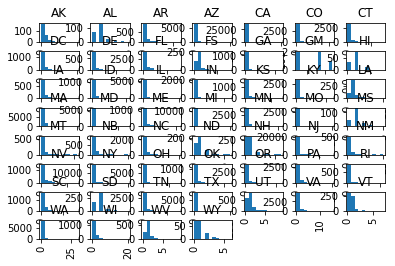

## Coverting datatypes

Check the dtypes

Convert POPULATION_GROUP_CODE and TOTAL_INDIVIDUAL_VICTIMS to integers

In [15]:
hate_crime.dtypes

INCIDENT_ID                   int64
DATA_YEAR                     int64
STATE_ABBR                   object
DIVISION_NAME                object
REGION_NAME                  object
POPULATION_GROUP_CODE        object
INCIDENT_DATE                object
TOTAL_OFFENDER_COUNT          int64
OFFENDER_RACE                object
VICTIM_COUNT                  int64
OFFENSE_NAME                 object
TOTAL_INDIVIDUAL_VICTIMS    float64
LOCATION_NAME                object
BIAS_DESC                    object
VICTIM_TYPES                 object
MULTIPLE_OFFENSE             object
MULTIPLE_BIAS                object
dtype: object

In [19]:
#convert dtypes from string to numeric 
hate_crime[['POPULATION_GROUP_CODE',]] = hate_crime[['POPULATION_GROUP_CODE']].apply(pd.to_numeric, errors = 'coerce', downcast='integer')

#convert float to int
hate_crime[['TOTAL_INDIVIDUAL_VICTIMS', 'POPULATION_GROUP_CODE']] = hate_crime[['TOTAL_INDIVIDUAL_VICTIMS', 'POPULATION_GROUP_CODE']].convert_dtypes(convert_integer=True,
                                                                                              convert_string=False)

In [20]:
hate_crime.dtypes

INCIDENT_ID                  int64
DATA_YEAR                    int64
STATE_ABBR                  object
DIVISION_NAME               object
REGION_NAME                 object
POPULATION_GROUP_CODE        Int64
INCIDENT_DATE               object
TOTAL_OFFENDER_COUNT         int64
OFFENDER_RACE               object
VICTIM_COUNT                 int64
OFFENSE_NAME                object
TOTAL_INDIVIDUAL_VICTIMS     Int64
LOCATION_NAME               object
BIAS_DESC                   object
VICTIM_TYPES                object
MULTIPLE_OFFENSE            object
MULTIPLE_BIAS               object
dtype: object

In [21]:
#summary stats for numerical data

hate_crime.describe()

,INCIDENT_ID,DATA_YEAR,POPULATION_GROUP_CODE,TOTAL_OFFENDER_COUNT,VICTIM_COUNT,TOTAL_INDIVIDUAL_VICTIMS
count,2.195770e+05,219577.000000,116401.000000,219577.000000,219577.000000,219577.000000
mean,2.080389e+05,2005.472691,4.142688,0.955724,1.247567,0.969113
std,3.251394e+05,8.591466,1.567379,1.358364,2.274116,1.170866
min,2.000000e+00,1991.000000,0.000000,0.000000,1.000000,0.000000
25%,5.489600e+04,1998.000000,3.000000,0.000000,1.000000,1.000000
50%,1.097900e+05,2005.000000,4.000000,1.000000,1.000000,1.000000
75%,1.646850e+05,2013.000000,5.000000,1.000000,1.000000,1.000000
max,1.358628e+06,2020.000000,7.000000,99.000000,900.000000,147.000000


In [22]:
#summary stats for categorical data
hate_crime.describe(exclude=[np.number])

,STATE_ABBR,DIVISION_NAME,REGION_NAME,INCIDENT_DATE,OFFENDER_RACE,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
count,219577,219577,219577,219577,219577,219577,219577,219577,219577,219577,219577
unique,53,11,6,10958,7,353,131,279,55,2,2
top,CA,Pacific,West,12-SEP-01,Unknown,Destruction/Damage/Vandalism of Property,Residence/Home,Anti-Black or African American,Individual,S,S
freq,36235,49642,66996,178,97354,66774,65093,74762,173885,209857,218558


In [24]:
hate_crime.var()

INCIDENT_ID                 1.057156e+11
DATA_YEAR                   7.381329e+01
POPULATION_GROUP_CODE       2.456676e+00
TOTAL_OFFENDER_COUNT        1.845154e+00
VICTIM_COUNT                5.171605e+00
TOTAL_INDIVIDUAL_VICTIMS    1.370926e+00
dtype: float64

## Normalize or Standard Scaler

In [25]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

## Political Climate dataset

There are no missing values

In [16]:
# political climate csv
political = pd.read_csv('political_climate.csv')
political

,Congress,Year Start,Year End,House Majority,Senate Majority,Presidency,President,Party Government
0,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
1,103,1993,1995,Democrats,Democrats,Democrat,Clinton,Unified
2,104,1995,1997,Republicans,Republicans,Democrat,Clinton,Divided
3,105,1997,1999,Republicans,Republicans,Democrat,Clinton,Divided
4,106,1999,2001,Republicans,Republicans,Democrat,Clinton,Divided
5,107,2001,2003,Republicans,Republicans / Democrats12,Republican,G.W. Bush,Unified / Divided
6,108,2003,2005,Republicans,Republicans,Republican,G.W. Bush,Unified
7,109,2005,2007,Republicans,Republicans,Republican,G.W. Bush,Unified
8,110,2007,2009,Democrats,Democrats13,Republican,G.W. Bush,Divided
9,111,2009,2011,Democrats,Democrats,Democrat,Obama,Unified


In [17]:
political.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Congress          15 non-null     int64 
 1   Year Start        15 non-null     int64 
 2   Year End          15 non-null     int64 
 3   House Majority    15 non-null     object
 4   Senate Majority   15 non-null     object
 5   Presidency        15 non-null     object
 6   President         15 non-null     object
 7   Party Government  15 non-null     object
dtypes: int64(3), object(5)
memory usage: 1.1+ KB
